# <center>Prediction Of Global Sales Of Video Games using Machine Learning

<img src='videogame.jpg' width=1000 height=600>

<p> In this project we processing and exploring a large amount of data on video game sales.This dataset contains a list of video games with  sales greater than 100,000 copies. Each row in the dataset represents a game, whereas, each column contains different attributes.It contains   information regarding the sales of video games across various regions like North America, Europe, Japan and also globally, while also  giving information regarding the Names, Publishers,Genre and Platforms,Critic Score,Critic Count,User Score,User Count,Developer,Rating.</p>

 <p>The data set includes information about:<br>
    Name - The name of the game.<br>
    Platform- The platform on which the game was released.<br>
    Year_of_Release- The year in which the game was released.<br>
    Genre-The genre of the game.<br>
    Publisher-The publisher of the game.<br>
    NA_Sales, EU_Sales, JP_Sales , Other_Sales, Global_Sales - Sales made by a particular game in North America, Europe, Japan,                                                                 Other  regions and Globally (in millions).<br>
    Critic_score - Aggregate score compiled by Metacritic staff.<br>
    Critic_count - The number of critics used in coming up with the Critic_score. <br>
    User_score -  Score by Metacritic's subscribers.<br>
    User_count - Number of users who gave the user_score.<br>
    Developer - Party responsible for creating the game.<br>
    Rating -  The ESRB Rating.</p>

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Loading  the dataset

In [2]:
df = pd.read_csv("./Video_Games_Sales.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


#### Data exploration

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.sample(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
7120,New Carnival Games,DS,2010.0,Misc,Take-Two Interactive,0.16,0.05,0.00,0.02,0.22,NaN,NaN,tbd,NaN,Cat Daddy Games,E
9927,Love Live! School Idol Paradise,PSV,2014.0,Misc,Kadokawa Games,0.00,0.00,0.12,0.00,0.12,NaN,NaN,NaN,NaN,NaN,NaN
613,Perfect Dark,N64,2000.0,Action,Nintendo,1.55,0.75,0.16,0.06,2.52,NaN,NaN,NaN,NaN,NaN,NaN
12905,Shin Sangoku Musou 5 Empires,PSP,2010.0,Action,Tecmo Koei,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
6188,Cabela's Big Game Hunter 2012,X360,2011.0,Sports,Activision,0.24,0.02,0.00,0.02,0.28,NaN,NaN,tbd,NaN,Activision,T
1177,Pro Evolution Soccer 2010,PS2,2009.0,Sports,Konami Digital Entertainment,0.10,0.18,0.12,1.16,1.57,NaN,NaN,8.1,15.0,Konami,E
5418,The Shoot,PS3,2010.0,Shooter,Sony Computer Entertainment,0.13,0.15,0.01,0.05,0.34,60.0,39.0,6.2,11.0,Cohort Studios,T
8826,World League Soccer,SNES,1991.0,Sports,Imagineer,0.00,0.00,0.15,0.00,0.15,NaN,NaN,NaN,NaN,NaN,NaN
5472,Kelly Slater's Pro Surfer,PS2,2002.0,Sports,Activision,0.16,0.13,0.00,0.04,0.33,77.0,19.0,8.4,15.0,Treyarch,E
13212,Baku Baku,SAT,1995.0,Puzzle,Sega,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
df.shape

(16719, 16)

#### Checking the null percentage

In [8]:
df.isnull().mean()*100

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [9]:
df.dropna(inplace=True)

##### Checking the duplicate values

In [10]:
df.duplicated().sum()

0

## Explorartory Data Analysis

### Univariate analysis

##### Histogram

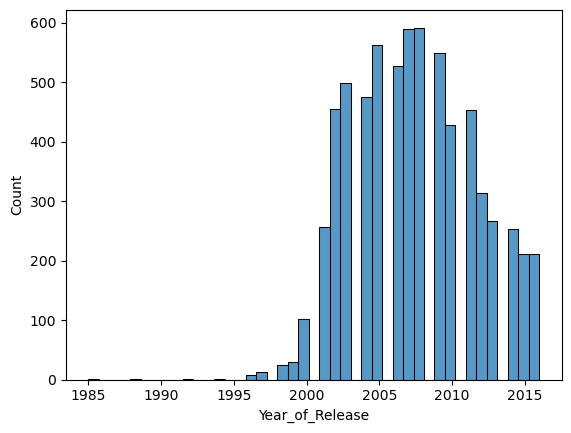

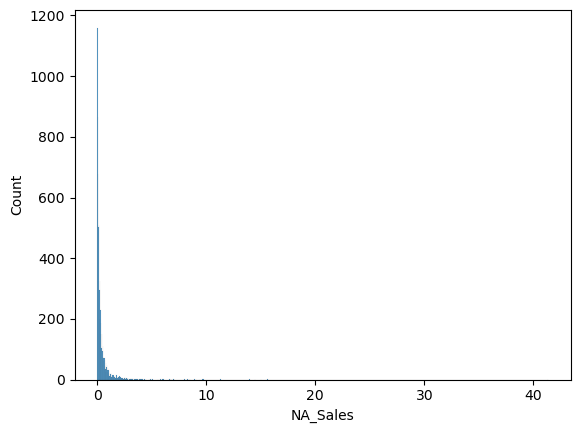

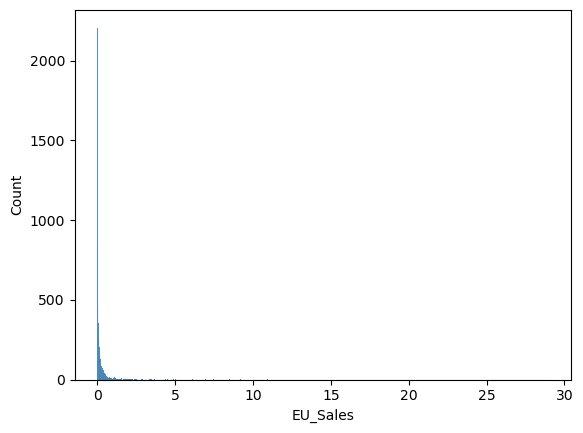

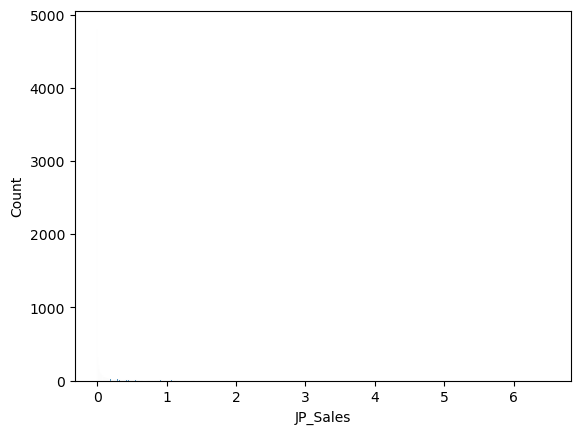

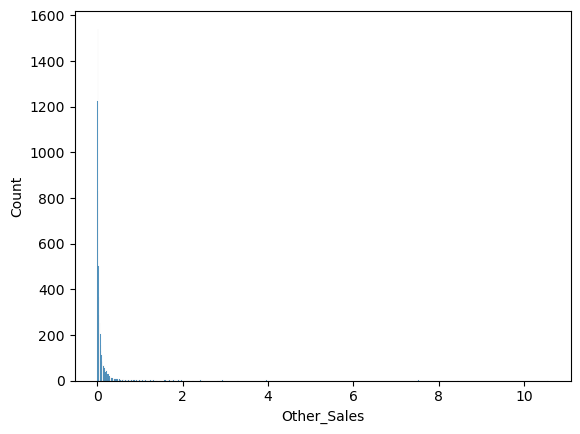

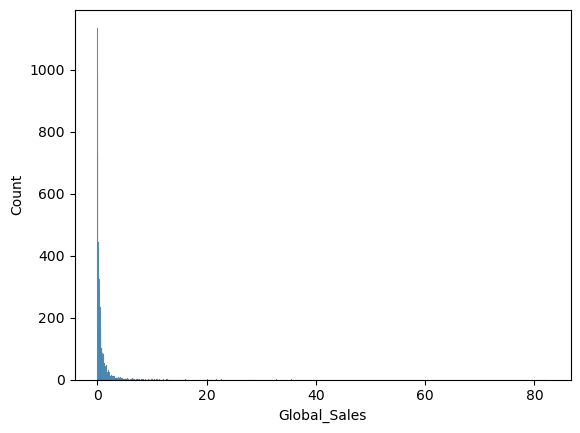

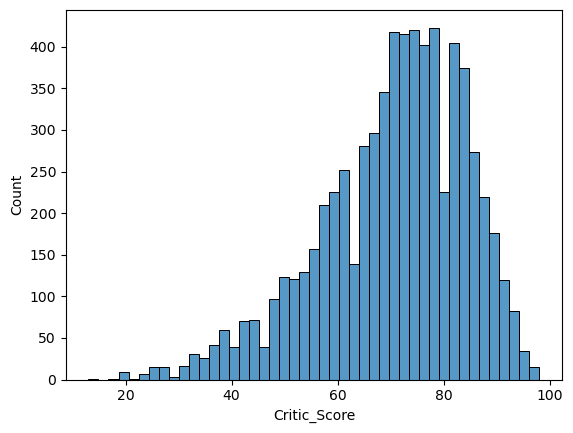

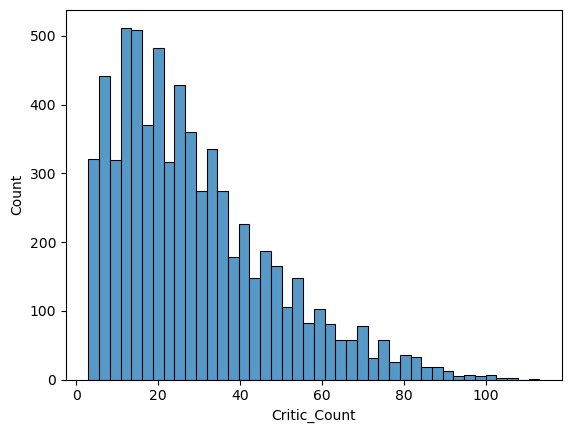

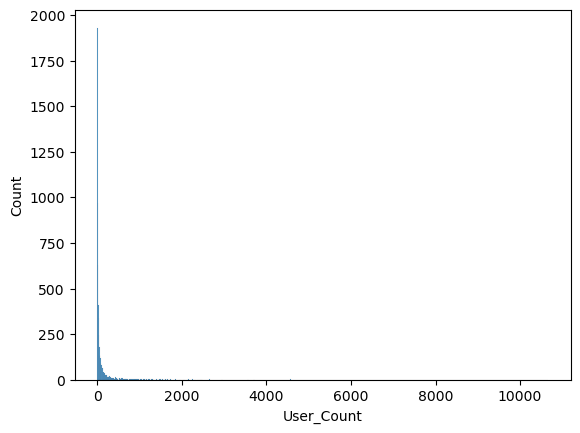

In [11]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i])
        plt.show()

##### KDE plot

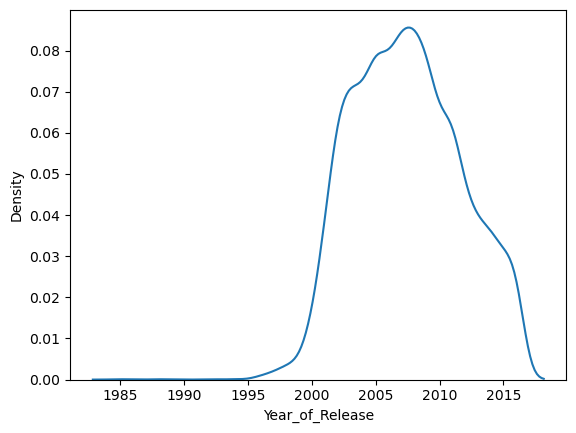

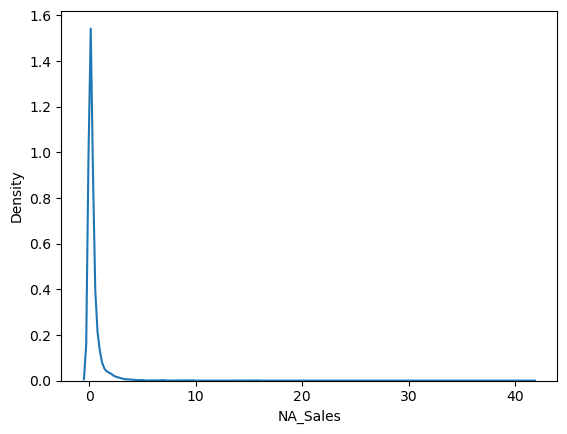

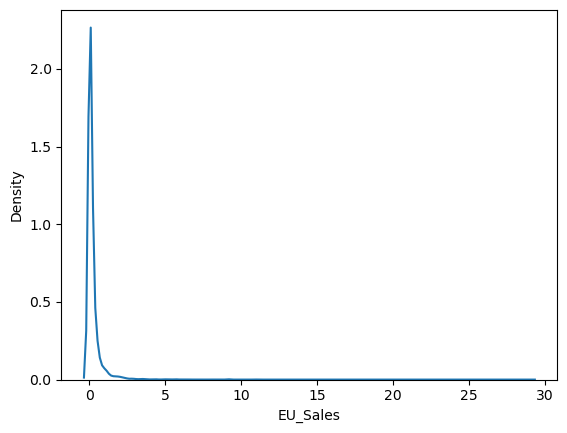

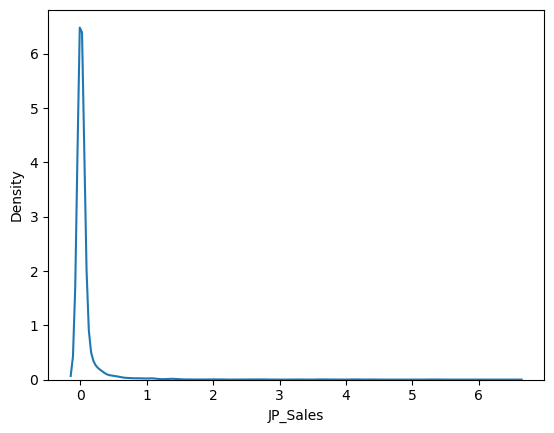

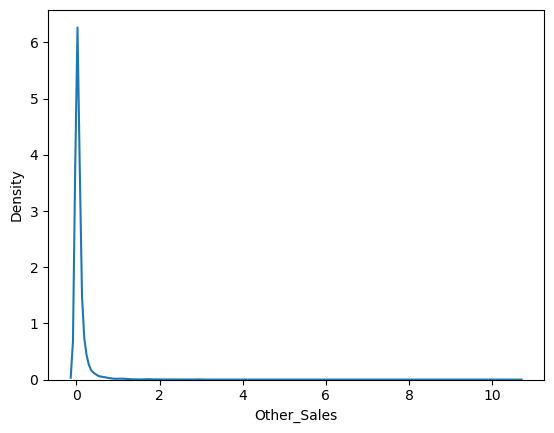

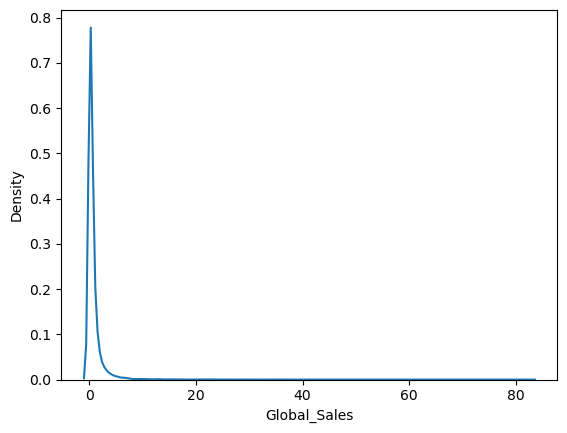

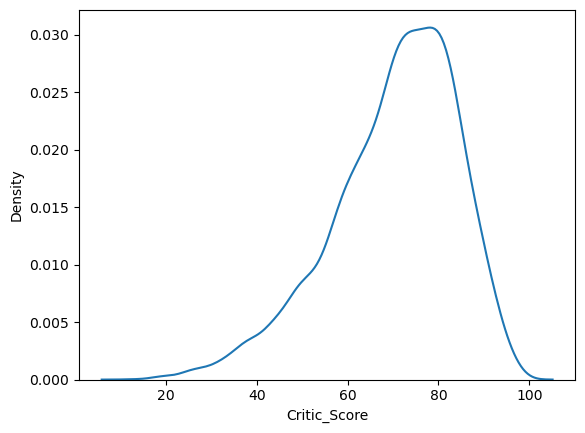

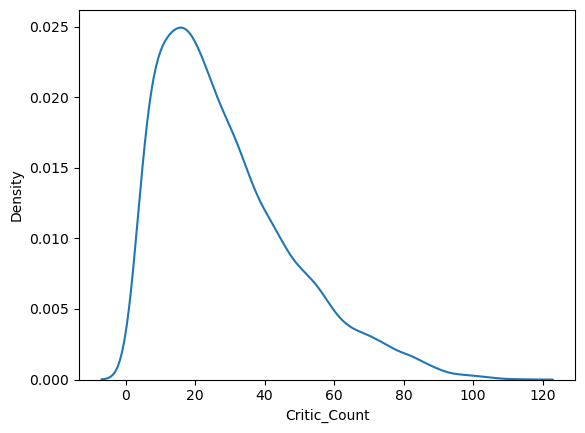

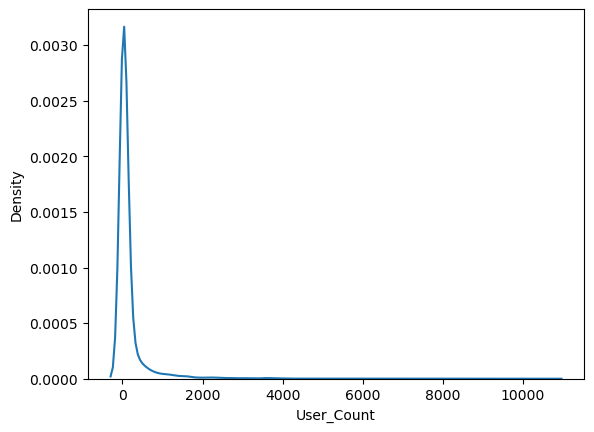

In [12]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show()

##### Box Plot

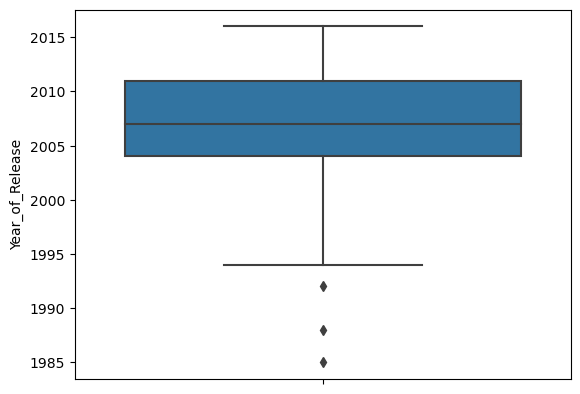

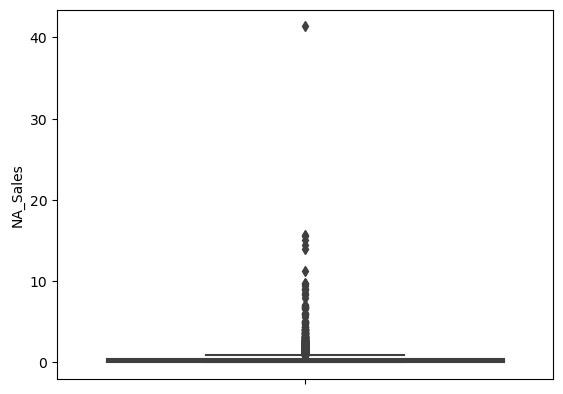

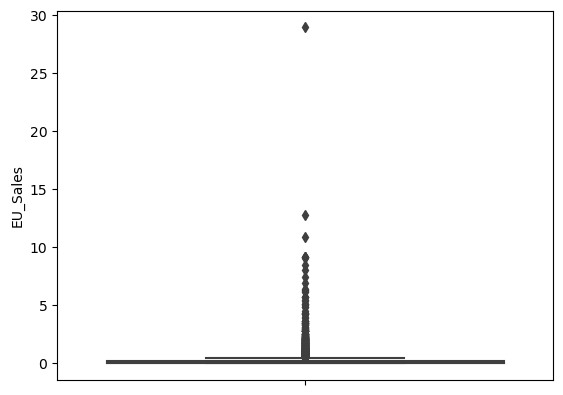

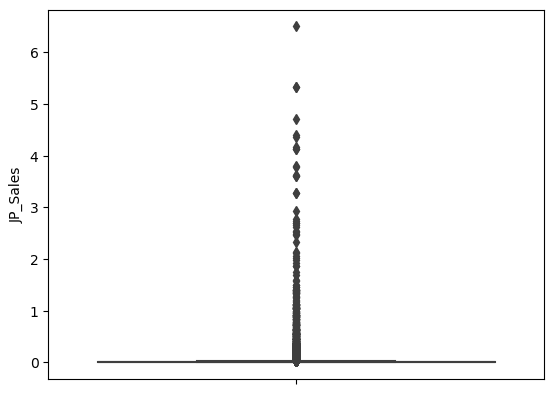

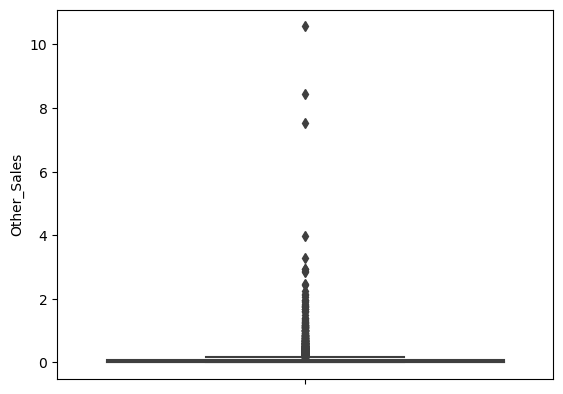

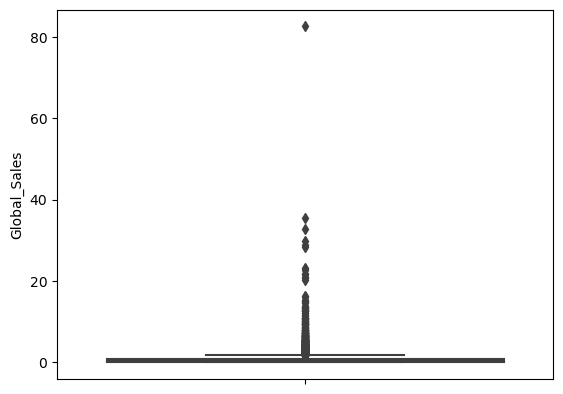

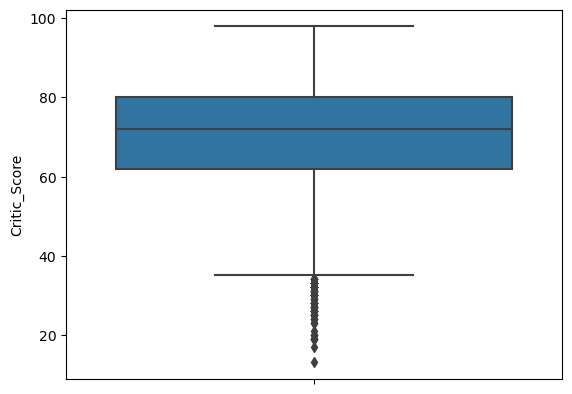

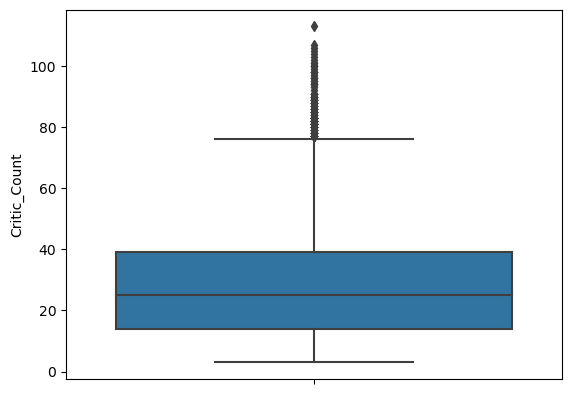

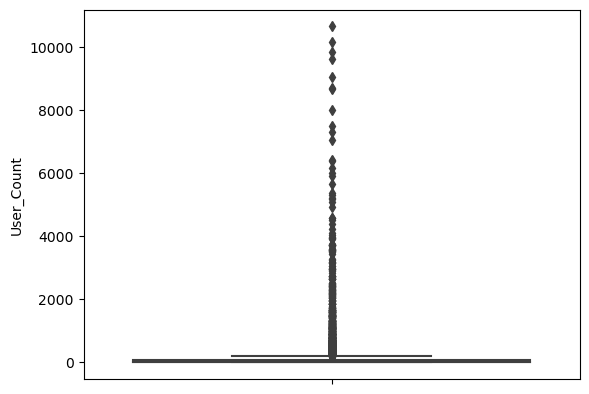

In [13]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i])
        plt.show()

##### Outliers are present , so we have to treat the outliers

In [14]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [15]:
for column in df.columns:
    if df[column].dtype != "object":
        UL,LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

#####  Drop the null values

In [16]:
df.dropna(inplace=True)

##### After outlier treatment again plot the Boxplot

In [17]:
df.drop(columns="JP_Sales",inplace=True)

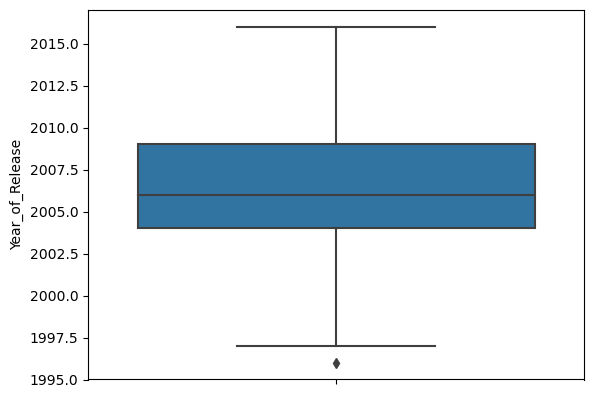

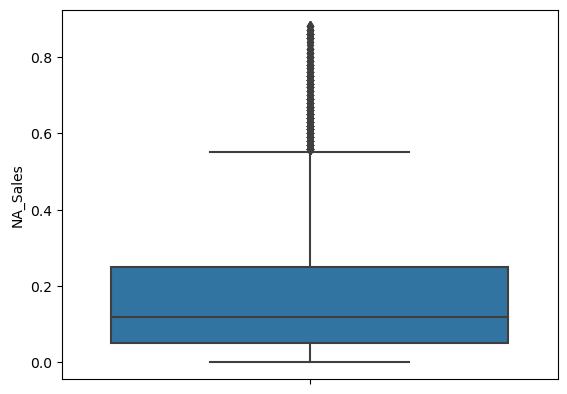

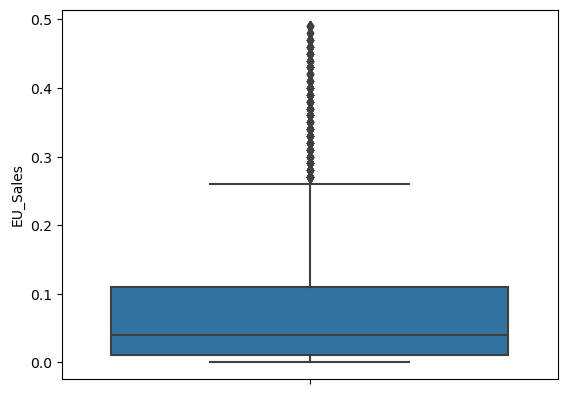

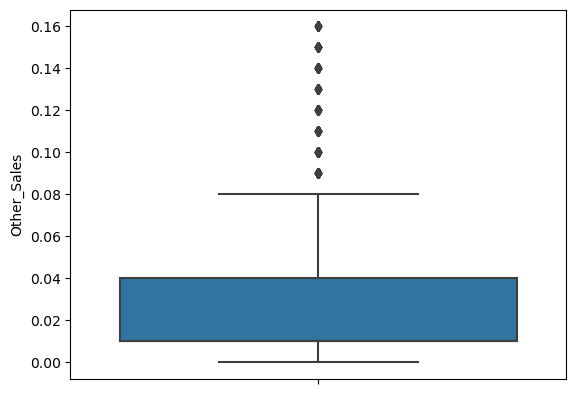

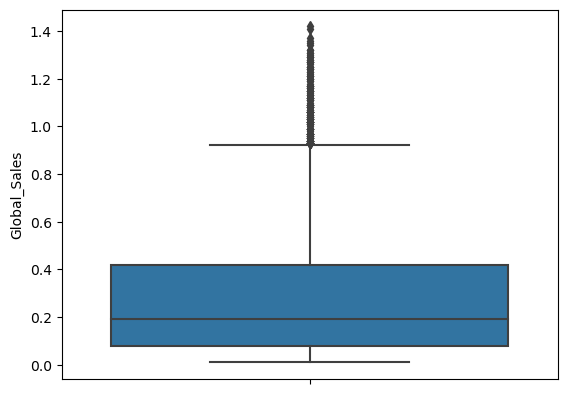

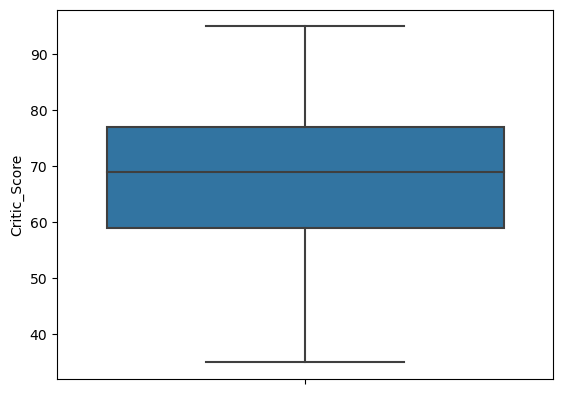

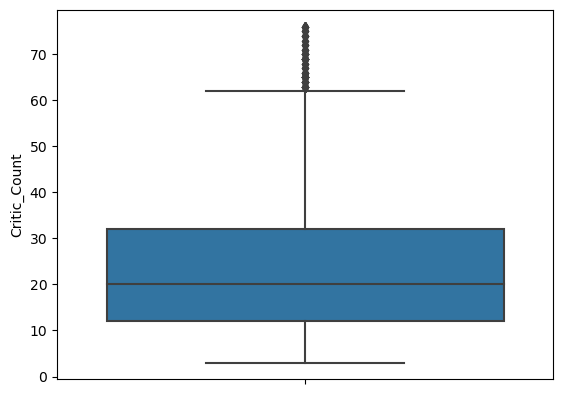

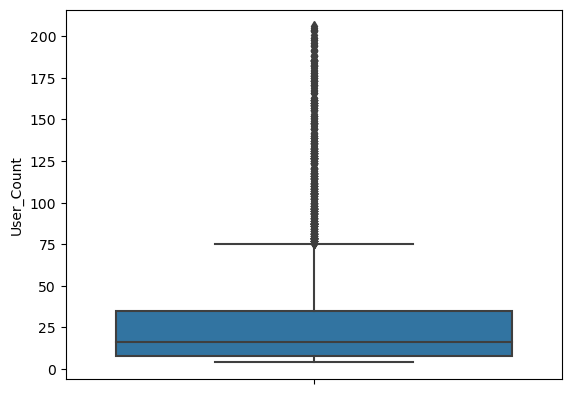

In [18]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
        plt.show()

### Multivariate Analysis

#####  Bar Chart


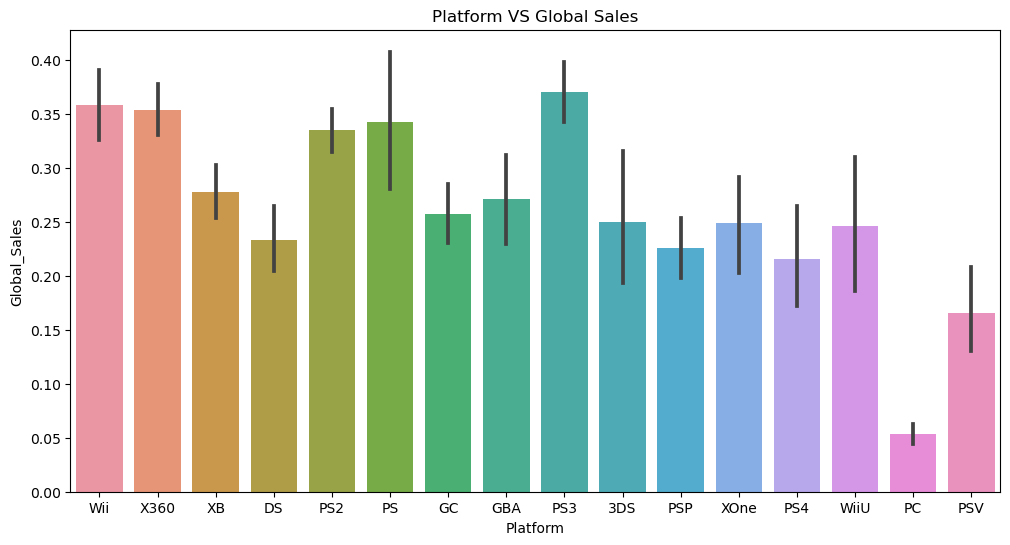

In [24]:
plt.figure(figsize=(12,6))
plt.title('Platform VS Global Sales')
sns.barplot(x= df['Platform'], y= df['Global_Sales']);

### Inference:
#### We can see that top selling games are for PS3 and lowest selling is PC

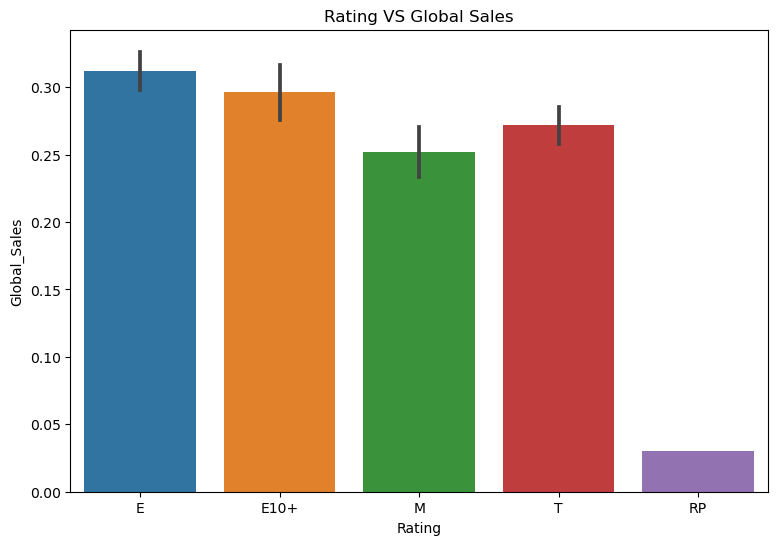

In [28]:
plt.figure(figsize=(9,6))
plt.title('Rating VS Global Sales')
sns.barplot(x=df['Rating'] , y=df['Global_Sales']);

### Inference :
#### Top selling game ratings belongs to E rating and lowest is of RP 

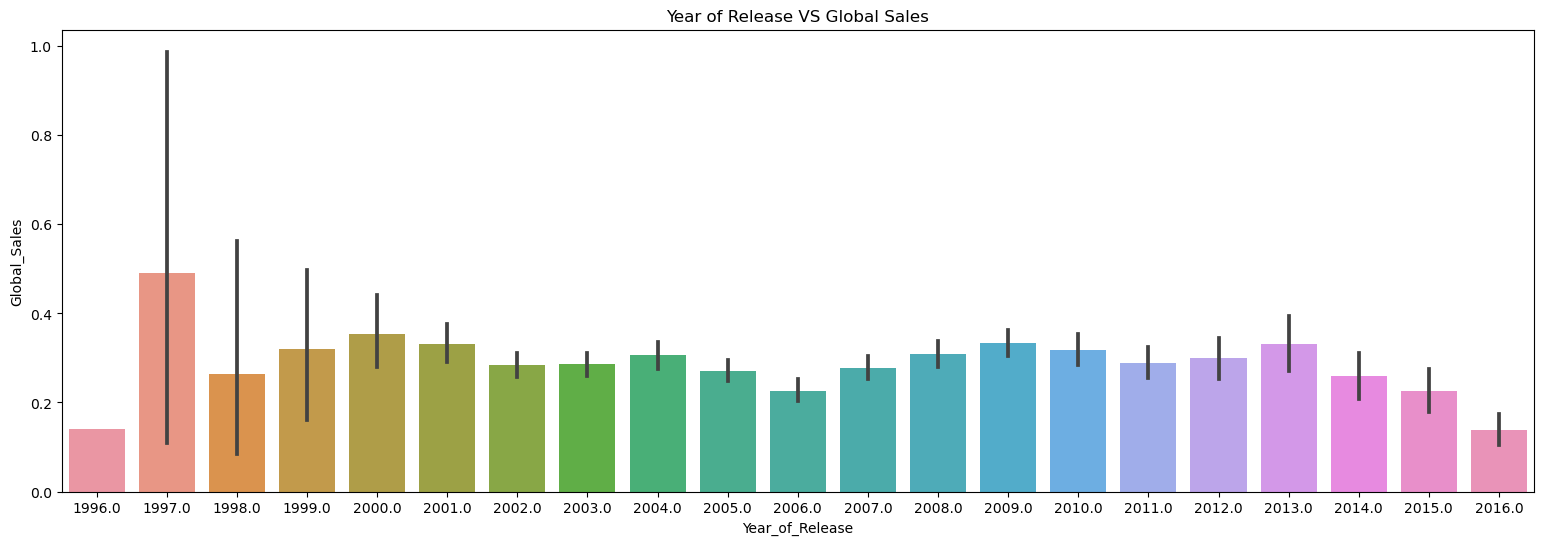

In [30]:
plt.figure(figsize=(19,6))
plt.title('Year of Release VS Global Sales')
sns.barplot(x=df['Year_of_Release'], y=df['Global_Sales']);

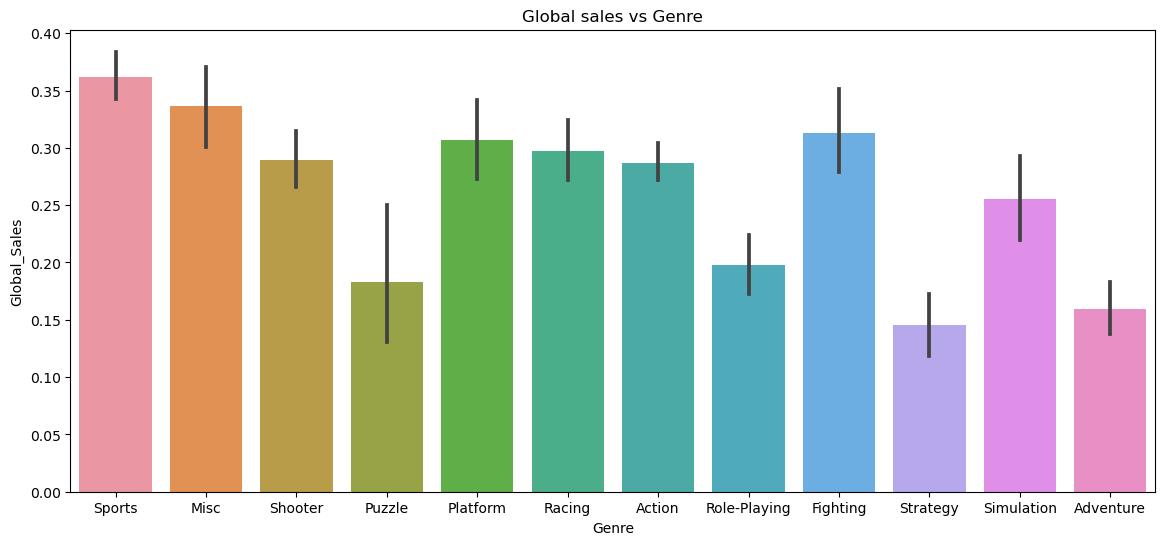

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x=df["Genre"],y=df["Global_Sales"])
plt.title("Global sales vs Genre");

##### Scatter Plot

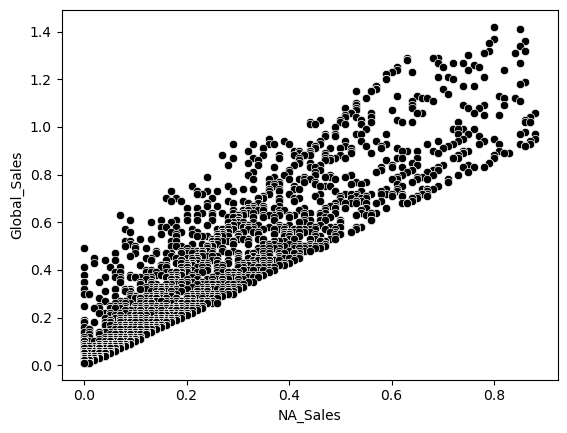

In [33]:
sns.scatterplot(df,x="NA_Sales",y="Global_Sales",color="Black");

#### Pie Chart

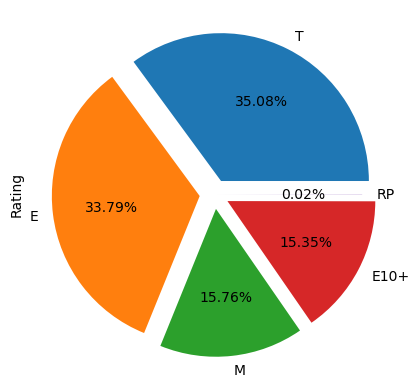

In [35]:
explode=0.1,0.1,0.1,0.1,0
df.Rating.value_counts().plot.pie(autopct='%1.2f%%',explode=explode);

#### Line Chart

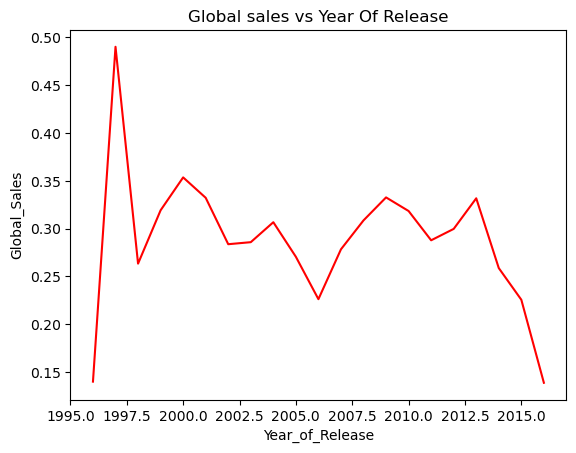

In [36]:
sns.lineplot(df,x="Year_of_Release",y="Global_Sales",color="red",ci=None);
plt.title("Global sales vs Year Of Release");

#### Pair Plot

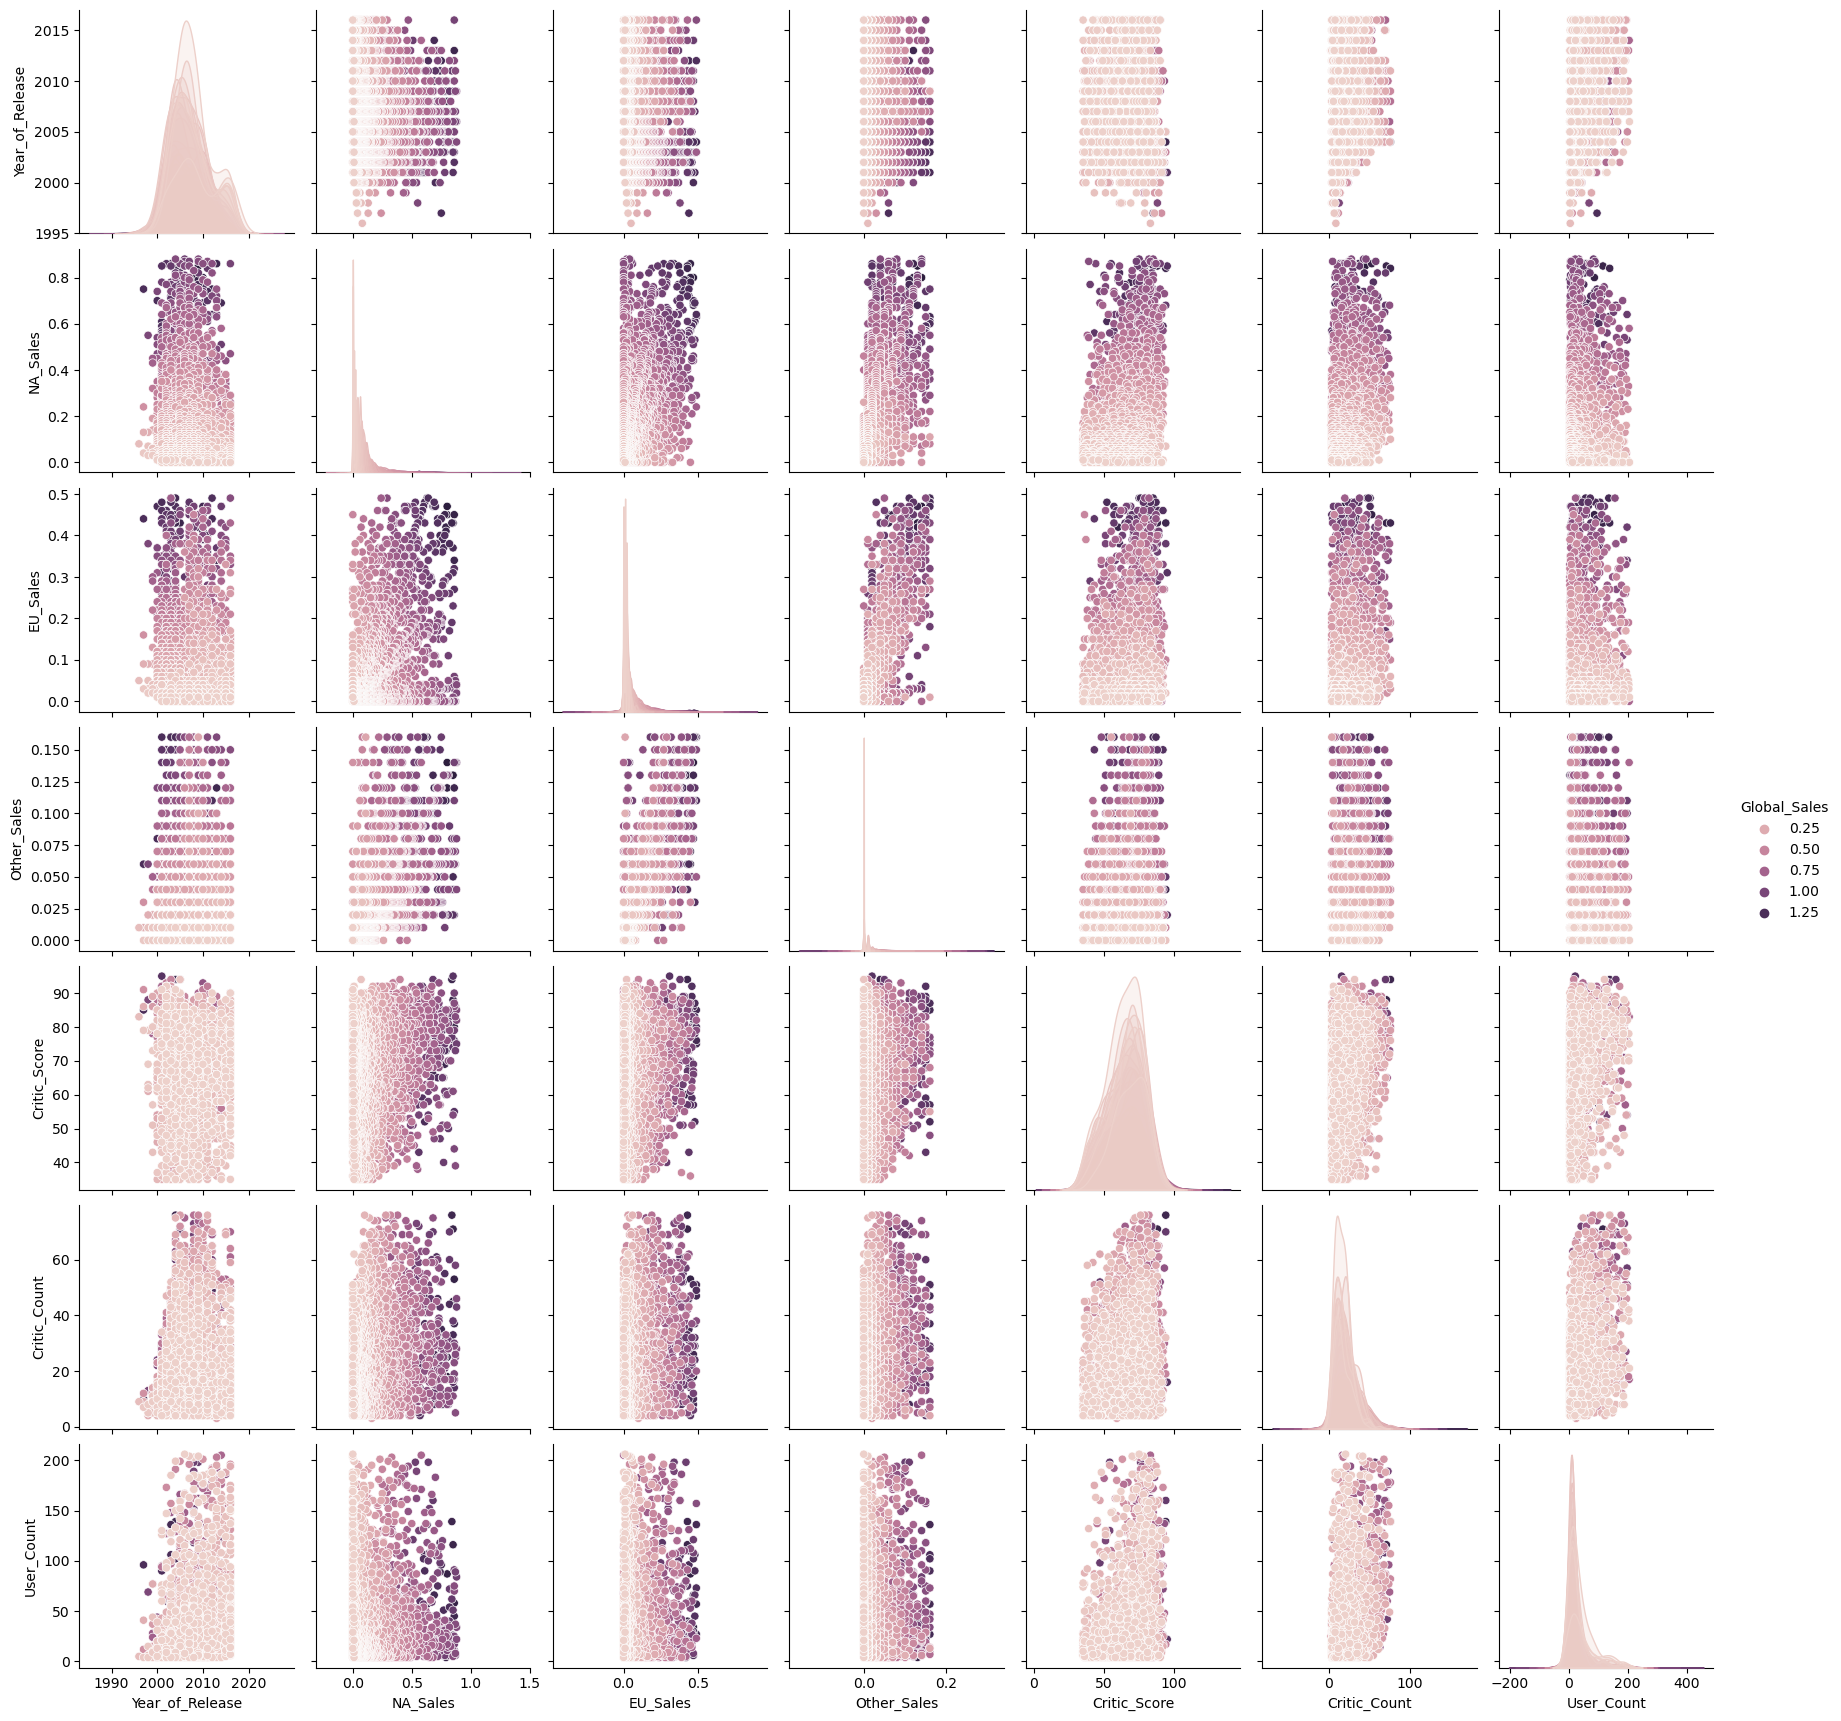

In [38]:
sns.pairplot(df,hue="Global_Sales");

#### Perform Label Encoding to convert the categorical variables

In [39]:
le = LabelEncoder()
df["Name"]=le.fit_transform(df["Name"])
df["Platform"]=le.fit_transform(df["Platform"])
df["Genre"]=le.fit_transform(df["Genre"])
df["Publisher"]=le.fit_transform(df["Publisher"])
df["User_Score"]=le.fit_transform(df["User_Score"])
df["Developer"]=le.fit_transform(df["Developer"])
df["Rating"]=le.fit_transform(df["Rating"])

##### Check the correlation with the target variable "Global Sales" 

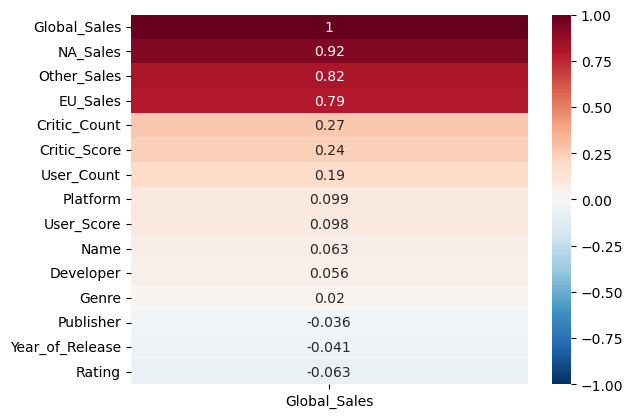

In [40]:
sns.heatmap(df.corr()[["Global_Sales"]].sort_values(by="Global_Sales",ascending=False),vmin=-1,vmax=1,annot=True,cmap="RdBu_r");

#### Take the only columns which have good correlation with the target variable "Global Sales"

In [41]:
x = df[["NA_Sales","EU_Sales","Other_Sales","Critic_Count","Critic_Score"]].values
y = df[["Global_Sales"]].values

###### Feature Scaling

In [42]:
sc = StandardScaler()

In [43]:
x = sc.fit_transform(x)

##### Model Building

In [44]:
models ={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [45]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model : {} ".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Average RMSE : ",rmse_avg)
    print("*"*100)

Cross validation model : LinearRegression 
Average RMSE :  0.006899428856893659
****************************************************************************************************
Cross validation model : Ridge 
Average RMSE :  0.006906350385334402
****************************************************************************************************
Cross validation model : AdaBoostRegressor 
Average RMSE :  0.10278721768297325
****************************************************************************************************
Cross validation model : GradientBoostingRegressor 
Average RMSE :  0.04526106523068992
****************************************************************************************************
Cross validation model : LinearSVR 
Average RMSE :  0.007181033887858822
****************************************************************************************************
Cross validation model : DecisionTreeRegressor 
Average RMSE :  0.06557657750384051
*********************

##### Since the Linear Regression model has the minimum rmse value, we will select it

In [47]:
model = LinearRegression()

##### Split the datase into training and testing data

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

###### Fit the model with the training data

In [49]:
model.fit(x_train,y_train)

LinearRegression()

###### We can check the efficiency of the model

In [50]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
R2_score = r2_score(y_test,model.predict(x_test))*100
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",R2_score)
print("training_score: ",training_score)
print("testing_score: ",testing_score)
print("mae: ",mae)
print("mse: ",mse)

r2score:  99.93238132643387
training_score:  99.93707259292214
testing_score:  99.93238132643387
mae:  0.004972802851224321
mse:  5.239998386719016e-05


###### Predicting values using the model

In [51]:
y_pred=model.predict(x)

###### After predicting we can compare it with the actual value

In [52]:
OUTPUT = pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype="float")
OUTPUT.head()

,ACTUAL,PREDICTED
0,1.42,1.409969
1,1.41,1.410897
2,1.37,1.370294
3,1.36,1.371565
4,1.35,1.339776


###### Scatter Plot

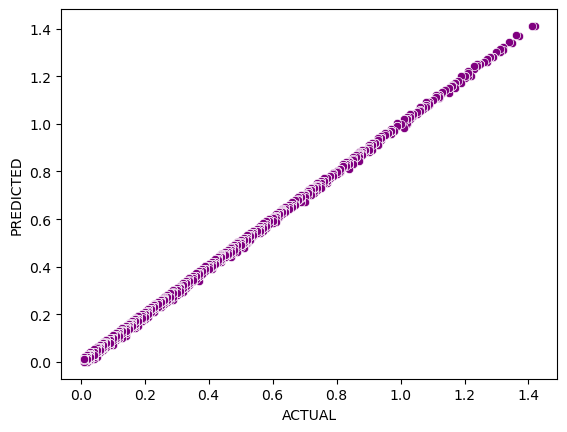

In [55]:
sns.scatterplot(OUTPUT,x="ACTUAL",y="PREDICTED",color="Purple");

In [56]:
model.score(x,y)

0.9993608572461234